## Introduction to support vector machine (SVM)
Link to the Youtube video tutorial: https://www.youtube.com/watch?v=FB5EdxAGxQg&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=11  <br />


**In this example:**  <br />
    1) A SVM model (machine learning model) is utilized for classification tasks.  <br /> 
    2) The independent variables (features) of this dataset are sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm)  <br />
    3) The dependent variable (ground truth/target) of this dataset is target (conveys the message of which species of iris flower does the given features belong to?)  <br />
    4) The dependent variable, target, is a categorical variable  <br />

**Theory behind SVM:**  <br />
1) To decide the best decision boundary (line) for a given dataset for classification problem:  <br />
    1) Take the nearby data points from the proposed decision boundary, then measure the distance (margin) between each of them.  <br />
    2) The decision boundary with higher margin is better, because it classifies the data points into different groups in a better way  <br />
    <img src="hidden\margin.png" alt="This image describes margin" style="width: 400px;"/>  <br />

    3) Hence, what SVM tries to do is to maximize the margins (the distances between the nearby data points and the line itself). The nearby points involved in margin calculation are called support vectors.  <br />
    <img src="hidden\margin2.png" alt="This image describes margin again" style="width: 400px;"/>  <br />

2) D (Dimension) refers to feature(independent variable) of a dataset.   <br />
    1) For the case of 2 features (in 2D space), the decision boundary is a line.   <br />
    2) For the case of 3 features (in 3D space), the decision boundary is a plane.  <br />
    3) For the case of N features (in ND space), the decision boundary is called a hyperplane.  <br />
    4) Hyperplane is a plane in N-dimensional that tries to separate/classify the data points of the dataset into different groups  <br />
    <img src="hidden\hyperplane.png" alt="This image describes hyperplane" style="width: 400px;"/>  <br />
    <img src="hidden\hyperplane2.png" alt="This image describes hyperplane again" style="width: 400px;"/>  <br />

3) Parameter: Gamma  <br />
    1) The higher the Gamma value, the data points closer to the proposed decision boundary are considered as support vectors to formulate (make decision for) the decision boundary.  <br />
    2) The lower the Gamma value, the data points further to the proposed decision boundary are considered as support vectors to formulate (make decision for) the decision boundary.  <br />
    3) Tune the Gamma value to get the best result, based on your dataset.  <br />
    <img src="hidden\gamma.png" alt="This image describes hyperplane again" style="width: 400px;"/>  <br />

4) Parameter: Regularization (C)  <br />
    1) The higher the regularization, the decision boundary for a dataset is drawn more carefully, the less classification error will get, the more probability to overfit the SVM model, the more non-linear the decision boundary looks like for a complex dataset.  <br />
    2) The lower the regularization, the decision boundary for a dataset is drawn less carefully, the more classification error will get, the less probability to overfit the SVM model, the more linear the decision boundary looks like for a complex dataset.  <br />
    3) Tune the regularization value to get the best result, based on your dataset.  <br />
    <img src="hidden\regularization.png" alt="This image describes hyperplane again" style="width: 400px;"/>  <br />

5) Parameter: Kernel  <br />
    0) Kernel is a tool you utilized to create a transformation on your existing features (the features of the dataset) so that we can draw the decision boundary easily.  <br />
    1) For a complex dataset with 2 features (2D), it might be not easy to draw the decision boundary in a 2D space.  <br />
    <img src="hidden\kernel0.png" alt="This image describes hyperplane again" style="width: 400px;"/>  <br />
    2) Hence, you can create a third dimension called z, with a equation that relates x and y variables (dimensions). The z variable does some transformation on the basic features (x & y) of the dataset and create a new feature as shown below. A decision boundary can be drawned easily on this new feature.  <br />
    <img src="hidden\kernel.png" alt="This image describes hyperplane again" style="width: 400px;"/>  <br />
    3) Once you have the decision boundary drawn, you can superimpose the decision boundary on your y-plane, and the decision boundary drawn looks like below (in original 2D xy-plane [the plane consists of the basic features of the dataset]).  <br />
    <img src="hidden\kernel2.png" alt="This image describes hyperplane again" style="width: 400px;"/>  <br />

### Load the dataset

In [231]:
import pandas as pd

# import the sklearn ready-made dataset of iris
from sklearn.datasets import load_iris

# load the dataset into the variable called iris
iris = load_iris()

# show the attributes of the dataset
print(dir(iris))

'''
The independent variable names are available in the attribute of feature_names of the dataset (sepal length (cm),sepal width (cm),petal length (cm),petal width (cm))
The data of the independent variables are available in the attribute of data of the dataset
The data of the dependent variable is available in the attribute of target of the dataset (0 for setosa, 1 for versicolor, 2 for virginica)
The representation of data of the dependent variable are available in the attribute of target_names of the dataset (setosa, versicolor, virginica) [Extra information: each of them is a species/type of iris flower]
'''

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


'\nThe independent variable names are available in the attribute of feature_names of the dataset (sepal length (cm),sepal width (cm),petal length (cm),petal width (cm))\nThe data of the independent variables are available in the attribute of data of the dataset\nThe data of the dependent variable is available in the attribute of target of the dataset (0 for setosa, 1 for versicolor, 2 for virginica)\nThe representation of data of the dependent variable are available in the attribute of target_names of the dataset (setosa, versicolor, virginica) [Extra information: each of them is a species/type of iris flower]\n'

In [232]:
# show the data available in the attribute of feature_names of the dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [233]:
# create a dataframe called df, by using the data available in the attribute of data of the dataset (data of independent variables),
# and use the data available in the attribute of feature_names of the dataset as the dataframe column names.
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# show the df dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [234]:
# show the data available in the attribute of target_names of the dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [235]:
# create a new column called target on the df dataframe, which stores the data of dependent variable (data available in the attribute of target of the dataset)
df['target'] = iris.target

# show the df dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data exploration

#### Check the row number of the dataframe starting to have the features of each species (setosa, versicolor, virginica)  <br />
 1)  Features of setosa: row 0 to 49 
 2)  Features of versicolor: row 50 to 99
 3)  Features of virginica: row 100 to 149

In [236]:
# check the row number starts to have the features of versicolor
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [237]:
# check the row number starts to have the features of virginica
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


#### Uses the data of a specified column to create another column, with apply()

In [238]:
# the function uses the data of a specified column to create another column.
# the function gets each data of the target column as x, then the data in the specified variable indexed by the same x is obtained.
# the function then transforms each of the data of x into the data in the specified variable indexed by the same x.
# after transforming all data available, all the transformed data are made into a new column.
# Here, we named the new column as flower_name. Then, concatenate the new column to the df dataframe.
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

# show the df dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Data visualization

#### Separate 3 species into 3 dataframe

In [239]:
from matplotlib import pyplot as plt
%matplotlib inline

# separate 3 species into 3 dataframe
df0 = df[df.target==0] # the dataframe consists only the information of setosa
df1 = df[df.target==1] # the dataframe consists only the information of versicolor
df2 = df[df.target==2] # the dataframe consists only the information of virginica


In [240]:
# show df0 dataframe
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [241]:
# show df1 dataframe
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [242]:
# show df2 dataframe
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica


#### Visualize the samples/data points of each species in a scatter plot

##### By only using 2 features (sepal length & sepal width) 
**although SVM will use all 4 features for training later

Text(0.5, 1.0, 'Sepal length vs width for each species')

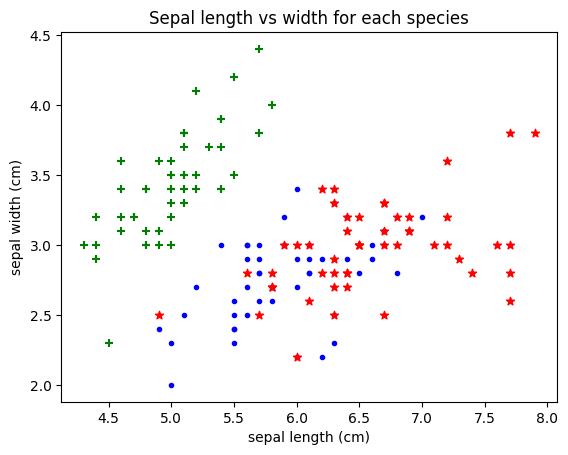

In [243]:
# draw a scatter plot (using the features of sepal length & sepal width only) for each species (to show the data points of all species in a scatter plot as a glance)
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color ='green',marker='+') # scatter plot for df0 dataframe
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color ='blue',marker='.') # scatter plot for df1 dataframe
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color ='red',marker='*') # scatter plot for df2 dataframe
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal length vs width for each species')

##### By only using 2 features (petal length & petal width) 
**although SVM will use all 4 features for training later

Text(0.5, 1.0, 'Petal length vs width for each species')

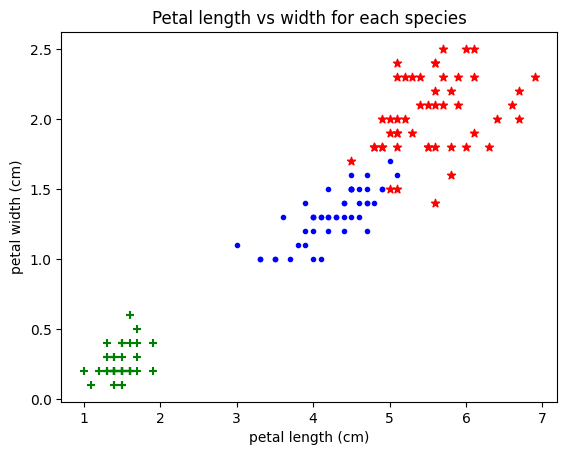

In [244]:
# draw a scatter plot (using the features of petal length & petal width only) for each species (to show the data points of all species in a scatter plot as a glance)
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color ='green',marker='+') # scatter plot for df0 dataframe
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color ='blue',marker='.') # scatter plot for df1 dataframe
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color ='red',marker='*') # scatter plot for df2 dataframe
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal length vs width for each species')

### Data preprocessing

#### Get the independent variables and dependent variable of the dataset

In [245]:
# load the data of independent variables available in df dataframe to variable X (drop the remaining data of df dataframe). We drop the columns of target and flower_name
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [246]:
# load the data of dependent variable available in df dataframe to variable Y
Y = df.target
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

#### Split dataset into training and testing data using train_test_split() method

In [247]:
from sklearn.model_selection import train_test_split

# split 20% of the dataset into test set, 80% of the dataset into train set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# check the number of samples in the train set and test set
print('The train set consists of '+ str(len(X_train)) + ' sample(s) and the test set consists of '+ str(len(X_test)) + ' sample(s)')


The train set consists of 120 sample(s) and the test set consists of 30 sample(s)


### Develop machine learning model (Support Vector Machine (SVM))

In [248]:
from sklearn.svm import SVC

#### Using the default SVM parameters (without changing the parameters manually)

In [249]:
# create the SVM model/classifier with default settings
model = SVC() 

# train the SVM model
model.fit(X_train,Y_train)

# show the accuracy of the trained SVM model
print('The accuracy of the trained SVM model with default settings:',model.score(X_test,Y_test)) 


The accuracy of the trained SVM model: 0.9666666666666667


#### Not using the default SVM parameters (modify/tune the parameters manually)

##### Modify the parameter: Regularization (C)
Theoretically, increase regularization will decrease its accuracy.

###### C = 100

In [250]:
# create a SVM model/classifier with C=100
model_modified_C = SVC(C=100) 

# train the SVM model
model_modified_C.fit(X_train,Y_train)

# show the accuracy of the trained SVM model
print('The accuracy of the trained SVM model with C=100:',model_modified_C.score(X_test,Y_test)) 


The accuracy of the trained SVM model with C=100: 0.9333333333333333


##### Modify the parameter: Gamma

###### Gamma = 1

In [251]:
# create a SVM model/classifier with gamma=1
model_modified_Gamma1 = SVC(gamma=1) 

# train the SVM model
model_modified_Gamma1.fit(X_train,Y_train)

# show the accuracy of the trained SVM model
print('The accuracy of the trained SVM model with Gamma=1:',model_modified_Gamma1.score(X_test,Y_test)) 


The accuracy of the rained SVM model with Gamma=1: 0.9333333333333333


###### Gamma = 100

In [252]:
# create the SVM model/classifier with Gamma=100
model_modified_Gamma100 = SVC(gamma=100) 

# train the SVM model
model_modified_Gamma100.fit(X_train,Y_train)

# show the accuracy of the trained SVM model
print('The accuracy of the rained SVM model with Gamma=100:',model_modified_Gamma100.score(X_test,Y_test)) 


The accuracy of the rained SVM model with Gamma=100: 0.4666666666666667


##### Modify the parameter: Kernel

###### Kernel = linear

In [253]:
# create the SVM model/classifier
model_modified_linear = SVC(kernel='linear') 

# train the SVM model
model_modified_linear.fit(X_train,Y_train)

# show the accuracy of the trained SVM model with linear kernel
print('The accuracy of the rained SVM model with linear kernel:',model_modified_linear.score(X_test,Y_test)) 


The accuracy of the rained SVM model with linear kernel: 0.9666666666666667


###### Kernel = rbf

In [254]:
# create the SVM model/classifier
model_modified_rbf = SVC(kernel='rbf') 

# train the SVM model
model_modified_rbf.fit(X_train,Y_train)

# show the accuracy of the trained SVM model with rbf kernel
print('The accuracy of the rained SVM model with rbf kernel:',model_modified_rbf.score(X_test,Y_test)) 


The accuracy of the rained SVM model with rbf kernel: 0.9666666666666667
